<a href="https://colab.research.google.com/github/jcarte99/HeartDiseaseModel/blob/main/Heart_Disease_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import seaborn
import statsmodels.api as sm 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy import stats

In [ ]:
df = pd.read_csv('hdu.csv')

In [ ]:
df.shape

(741, 16)

In [ ]:
df.describe

<bound method NDFrame.describe of       id  age   sex        dataset               cp  trestbps  chol    fbs  \
0    657   56  Male    Switzerland     asymptomatic       120     0  False   
1    290   56  Male      Cleveland  atypical angina       120   240  False   
2    684   61  Male    Switzerland     asymptomatic       125     0  False   
3     59   54  Male      Cleveland      non-anginal       125   273  False   
4    187   42  Male      Cleveland      non-anginal       120   240   True   
..   ...  ...   ...            ...              ...       ...   ...    ...   
736  855   55  Male  VA Long Beach     asymptomatic       172   260  False   
737  816   63  Male  VA Long Beach     asymptomatic       160   267   True   
738  807   69  Male  VA Long Beach     asymptomatic       140   208  False   
739  593   52  Male        Hungary     asymptomatic       160   331  False   
740  784   56  Male  VA Long Beach      non-anginal       170     0  False   

              restecg  thalch

In [ ]:
df_drop = df.drop(['dataset', 'ca', 'thal','slope'], axis=1)

In [ ]:
df_drop.dropna

<bound method DataFrame.dropna of       id  age   sex               cp  trestbps  chol    fbs           restecg  \
0    657   56  Male     asymptomatic       120     0  False  st-t abnormality   
1    290   56  Male  atypical angina       120   240  False            normal   
2    684   61  Male     asymptomatic       125     0  False            normal   
3     59   54  Male      non-anginal       125   273  False    lv hypertrophy   
4    187   42  Male      non-anginal       120   240   True            normal   
..   ...  ...   ...              ...       ...   ...    ...               ...   
736  855   55  Male     asymptomatic       172   260  False            normal   
737  816   63  Male     asymptomatic       160   267   True  st-t abnormality   
738  807   69  Male     asymptomatic       140   208  False  st-t abnormality   
739  593   52  Male     asymptomatic       160   331  False            normal   
740  784   56  Male      non-anginal       170     0  False    lv hypertrop

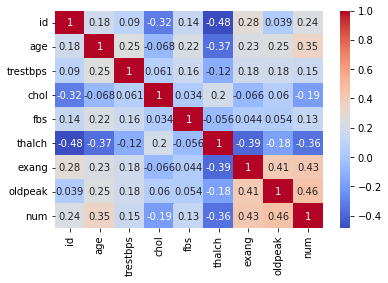

In [ ]:
df_corr = df_drop.corr()
seaborn.heatmap(df_corr,annot=True,cmap='coolwarm')

In [ ]:
df_dummies = pd.get_dummies(df_drop, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang'], drop_first='TRUE')

In [ ]:
df_dummies.columns

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num', 'sex_Male',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_True',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_True'],
      dtype='object')

In [ ]:
df_int = df_dummies.apply(pd.to_numeric)
print ("\nto_numeric with assign: \n",df_int.dtypes)


to_numeric with assign: 
 id                            int64
age                           int64
trestbps                      int64
chol                          int64
thalch                        int64
oldpeak                     float64
num                           int64
sex_Male                      uint8
cp_atypical angina            uint8
cp_non-anginal                uint8
cp_typical angina             uint8
fbs_True                      uint8
restecg_normal                uint8
restecg_st-t abnormality      uint8
exang_True                    uint8
dtype: object


In [ ]:
df_stg = {'id' : int,
          'age': int,
          'trestbps': int,
          'chol': int,
          'thalch': int,
          'oldpeak': int,
          'num': int,
          'sex_Male': int,
          'cp_atypical angina': int,
          'cp_non-anginal': int,
          'cp_typical angina': int,
          'fbs_True': int,
          'restecg_normal': int,
          'restecg_st-t abnormality': int,
          'exang_True': int}

In [ ]:
df_int_final = df_int.astype(df_stg)

In [ ]:
df_int_final.dtypes

id                          int64
age                         int64
trestbps                    int64
chol                        int64
thalch                      int64
oldpeak                     int64
num                         int64
sex_Male                    int64
cp_atypical angina          int64
cp_non-anginal              int64
cp_typical angina           int64
fbs_True                    int64
restecg_normal              int64
restecg_st-t abnormality    int64
exang_True                  int64
dtype: object

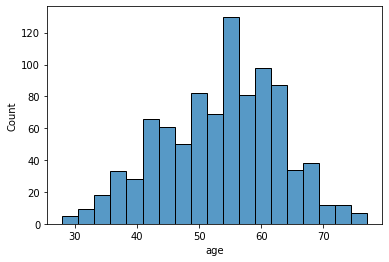

In [ ]:
seaborn.histplot(data=df_dummies['age'])

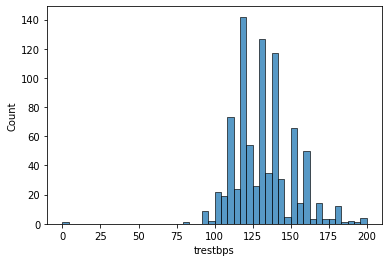

In [ ]:
seaborn.histplot(data=df_dummies['trestbps'])

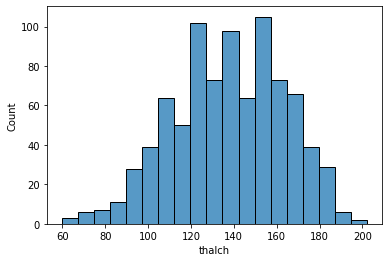

In [ ]:
seaborn.histplot(data=df_dummies['thalch'])

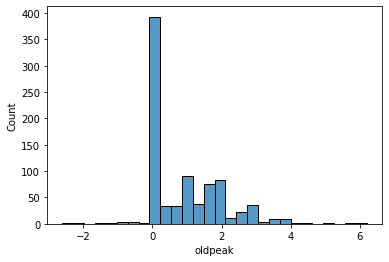

In [ ]:
seaborn.histplot(data=df_dummies['oldpeak'])

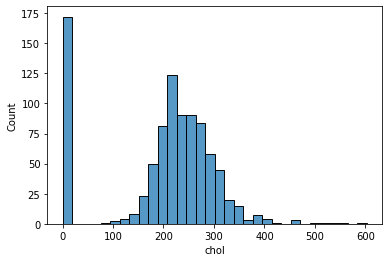

In [ ]:
seaborn.histplot(data=df_dummies['chol'])

In [ ]:
features = df_int_final[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'sex_Male',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_True',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_True']]

In [ ]:
X = features
y = df_int_final[['num']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0, train_size=0.7)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_tmm = min_max_scaler.fit_transform(X_train)
X_testmm = min_max_scaler.fit_transform(X_test)

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_tmm, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf.score(X_tmm, y_train)

0.6235521235521235

In [ ]:
est = sm.OLS(y_train, X_tmm)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    num   R-squared (uncentered):                   0.656
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                              73.97
Date:                Wed, 12 Oct 2022   Prob (F-statistic):                   7.32e-108
Time:                        04:57:10   Log-Likelihood:                         -655.10
No. Observations:                 518   AIC:                                      1336.
Df Residuals:                     505   BIC:                                      1391.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Insignificant variables: 


*   trestbp
*   thalch
*   fbs
* rest ecg




In [ ]:
tree2 = DecisionTreeClassifier(max_leaf_nodes=5, random_state= 0)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

[Text(0.5555555555555556, 0.875, 'X[12] <= 0.5\ngini = 0.66\nsamples = 518\nvalue = [260, 132, 56, 53, 17]'),
 Text(0.3333333333333333, 0.625, 'X[6] <= 0.5\ngini = 0.459\nsamples = 306\nvalue = [218, 51, 19, 13, 5]'),
 Text(0.2222222222222222, 0.375, 'X[5] <= 0.5\ngini = 0.557\nsamples = 212\nvalue = [132, 44, 19, 12, 5]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.292\nsamples = 61\nvalue = [51, 5, 2, 2, 1]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.628\nsamples = 151\nvalue = [81, 39, 17, 10, 4]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.157\nsamples = 94\nvalue = [86, 7, 0, 1, 0]'),
 Text(0.7777777777777778, 0.625, 'X[0] <= 59.5\ngini = 0.746\nsamples = 212\nvalue = [42, 81, 37, 40, 12]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.688\nsamples = 136\nvalue = [29, 65, 19, 18, 5]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.778\nsamples = 76\nvalue = [13, 16, 18, 22, 7]')]

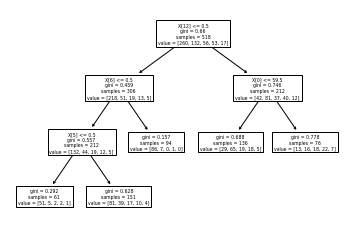

In [ ]:
tree.plot_tree(tree2)

In [ ]:
regressor = RandomForestClassifier(n_estimators=10, random_state=0)
regressor.fit(X_tmm, y_train)
y_pred= regressor.predict(X_testmm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[92  5  0  0  0]
 [35 34  3  0  1]
 [10 11  0  0  2]
 [11  9  2  2  1]
 [ 3  1  0  1  0]]
              precision    recall  f1-score   support

           0       0.61      0.95      0.74        97
           1       0.57      0.47      0.51        73
           2       0.00      0.00      0.00        23
           3       0.67      0.08      0.14        25
           4       0.00      0.00      0.00         5

    accuracy                           0.57       223
   macro avg       0.37      0.30      0.28       223
weighted avg       0.53      0.57      0.51       223

0.5739910313901345
